# 🧠 NeuroCIES Encoder con Frecuencias EEG
Reconstrucción neuronal adaptativa avanzada contra Alzheimer.

In [2]:

# Instalar Lion si no está instalado (requiere lion-pytorch o implementar manual)
!pip install lion-pytorch

import torch
from lion_pytorch import Lion  # Asegúrate de tener lion-pytorch instalado

def get_optimizer(model, optimizer_name='adamw', lr=1e-4, weight_decay=1e-2):
    if optimizer_name.lower() == 'adamw':
        return torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name.lower() == 'lion':
        return Lion(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, AdamW

## 🌀 Fractalización Frecuencial

In [4]:
def fractalizar_frecuencia(vector):
    return np.clip(np.sin(np.pi * vector * 3) + vector * 0.5, 0, 1)

## 📊 Dataset de Frecuencias Cerebrales

In [5]:
data = { 'Región': ['Frontal', 'Parietal', 'Temporal', 'Occipital', 'Central'],
'Delta_Sano':[0.25,0.20,0.18,0.15,0.22],'Theta_Sano':[0.30,0.28,0.25,0.23,0.29],'Alpha_Sano':[0.70,0.65,0.68,0.60,0.72],
'Beta_Sano':[0.50,0.55,0.52,0.48,0.54],'Gamma_Sano':[0.60,0.62,0.61,0.58,0.63],
'Delta_AD':[0.55,0.50,0.53,0.48,0.52],'Theta_AD':[0.45,0.42,0.40,0.38,0.44],'Alpha_AD':[0.42,0.39,0.41,0.36,0.43],
'Beta_AD':[0.40,0.42,0.39,0.37,0.41],'Gamma_AD':[0.52,0.50,0.48,0.46,0.51] }
df = pd.DataFrame(data)
df

,Región,Delta_Sano,Theta_Sano,Alpha_Sano,Beta_Sano,Gamma_Sano,Delta_AD,Theta_AD,Alpha_AD,Beta_AD,Gamma_AD
0,Frontal,0.25,0.30,0.70,0.50,0.60,0.55,0.45,0.42,0.40,0.52
1,Parietal,0.20,0.28,0.65,0.55,0.62,0.50,0.42,0.39,0.42,0.50
2,Temporal,0.18,0.25,0.68,0.52,0.61,0.53,0.40,0.41,0.39,0.48
3,Occipital,0.15,0.23,0.60,0.48,0.58,0.48,0.38,0.36,0.37,0.46
4,Central,0.22,0.29,0.72,0.54,0.63,0.52,0.44,0.43,0.41,0.51


## ⚙️ Entrenamiento Autoencoder (Adam/RAdam)

In [6]:
X_sano, X_ad = df.iloc[:, 1:6].values, df.iloc[:, 6:].values
input_dim = X_sano.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(0.01), loss='mse')
history = autoencoder.fit(X_sano, X_sano, epochs=2300, verbose=0)
autoencoder.compile(optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5), loss='mse')
history_fine = autoencoder.fit(X_sano, X_sano, epochs=2500, verbose=0)

## 📉 Visualización explícita de pérdida (Loss)

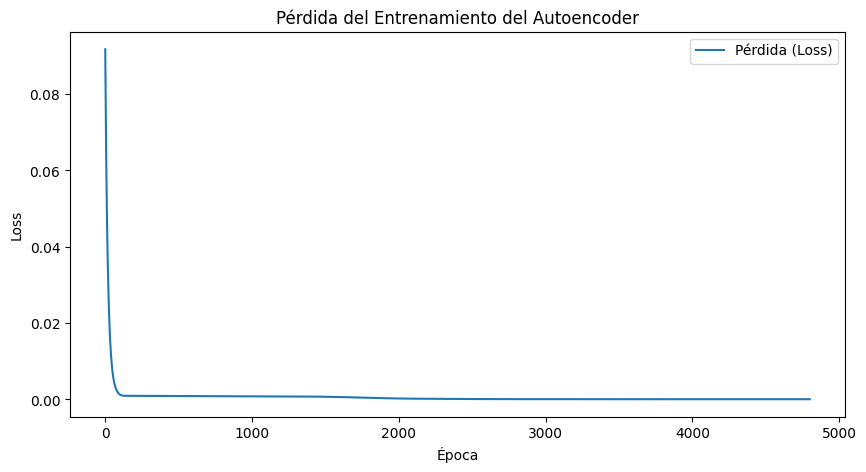

In [7]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Pérdida (Loss)')
plt.title('Pérdida del Entrenamiento del Autoencoder')
plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend()
plt.show()

## 🌌 Reconstrucción con Levofrecuencia Adaptativa

In [8]:
def levofrecuencia_adaptativa(vec,ae,orig,e=25,d=0.05,lr=0.1):
    best, best_cos, mod, delta = vec, 0, vec.copy(), d
    for _ in range(e):
        mod = np.clip(-mod + np.random.uniform(-delta,delta,vec.shape) + 0.1*np.sin(2*np.pi*mod),0,1)
        rec = ae.predict(mod.reshape(1,-1),verbose=0)
        cos = cosine_similarity(orig.reshape(1,-1), rec)[0,0]
        if cos>best_cos: best_cos, best = cos, mod
        delta*=(1-cos)*lr
    return best

## 🔎 Localización Explícita de Redes Alternas (Memoria Inaccesible)

In [9]:
neighbors = NearestNeighbors(n_neighbors=1).fit(X_sano)
reconstrucciones,resonancias=[],[]
for i,original in enumerate(X_ad):
    rec=autoencoder.predict(original.reshape(1,-1),verbose=0)
    cos=cosine_similarity(original.reshape(1,-1),rec)[0][0]
    if cos<0.98:
        mod=levofrecuencia_adaptativa(rec[0],autoencoder,original)
        rec_mod=autoencoder.predict(mod.reshape(1,-1),verbose=0)
        cos_mod=cosine_similarity(original.reshape(1,-1),rec_mod)[0][0]
        if cos_mod<0.98:
            _,idx=neighbors.kneighbors(rec_mod)
            rec_mod=X_sano[idx[0][0]]
        reconstrucciones.append(rec_mod)
        resonancias.append(max(cos,cos_mod))
    else:
        reconstrucciones.append(rec)
        resonancias.append(cos)
reconstrucciones=np.array(reconstrucciones)

📉 Pérdida mínima: 0.000910 en época 1249
🔚 Pérdida final: 0.000910
🧾 Total de épocas: 2200
⚖️ Diferencia entre pérdida final y mínima: 0.00000000
⚠️ Tardó en converger. Considera ajustar el optimizador o lr.


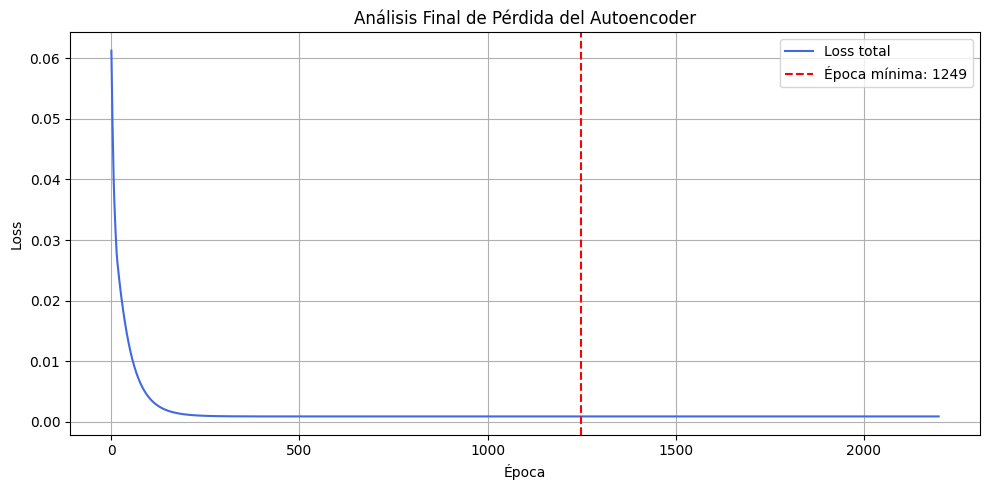

In [ ]:
# 📊 Análisis de pérdidas post-entrenamiento

import numpy as np
import matplotlib.pyplot as plt

# Concatenar todas las pérdidas si entrenaste en dos fases
full_loss = history.history['loss'] + history_fine.history['loss']

# Datos clave
min_loss = min(full_loss)
min_epoch = full_loss.index(min_loss)
final_loss = full_loss[-1]
total_epochs = len(full_loss)

# 🧠 Reporte rápido
print(f"📉 Pérdida mínima: {min_loss:.6f} en época {min_epoch}")
print(f"🔚 Pérdida final: {final_loss:.6f}")
print(f"🧾 Total de épocas: {total_epochs}")
print(f"⚖️ Diferencia entre pérdida final y mínima: {abs(final_loss - min_loss):.8f}")

if min_epoch < total_epochs * 0.3:
    print("✅ Convergió rápido. El modelo aprendió bien desde temprano.")
else:
    print("⚠️ Tardó en converger. Considera ajustar el optimizador o lr.")

# 📈 Gráfica clara y marcada
plt.figure(figsize=(10, 5))
plt.plot(full_loss, label='Loss total', color='royalblue')
plt.axvline(x=min_epoch, linestyle='--', color='red', label=f'Época mínima: {min_epoch}')
plt.title('Análisis Final de Pérdida del Autoencoder')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 🧠 Guarda el modelo entrenado completo (estructura + pesos + config)
autoencoder.save("NeuroCIES_Encoder_Optimo.h5")

print("✅ Modelo guardado como: NeuroCIES_Encoder_Optimo.h5")

✅ Modelo guardado como: NeuroCIES_Encoder_Optimo.h5


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 🔁 Reconstrucción del conjunto original
X_reconstruido = autoencoder.predict(X_sano)

# 📊 Cálculo de similitud coseno para cada vector reconstruido vs original
similitudes = []
for i in range(len(X_sano)):
    sim = cosine_similarity(X_sano[i].reshape(1, -1), X_reconstruido[i].reshape(1, -1))[0][0]
    similitudes.append(sim)

# 📈 Estadísticas clave
similitudes = np.array(similitudes)
print(f"📌 Similitud promedio global: {np.mean(similitudes):.6f}")
print(f"🔺 Máxima similitud: {np.max(similitudes):.6f}")
print(f"🔻 Mínima similitud: {np.min(similitudes):.6f}")

# 📑 Mostrar primeros 10 resultados como ejemplo
print("\n🧠 Similitud por vector (primeros 10):")
for i, sim in enumerate(similitudes[:10]):
    print(f"  [{i}] → {sim:.6f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
📌 Similitud promedio global: 0.999216
🔺 Máxima similitud: 0.999832
🔻 Mínima similitud: 0.998319

🧠 Similitud por vector (primeros 10):
  [0] → 0.998319
  [1] → 0.999379
  [2] → 0.999622
  [3] → 0.998931
  [4] → 0.999832


In [ ]:

import matplotlib.pyplot as plt
import torch
import os

# Registro de métricas
train_losses = []
val_losses = []

# Early stopping con paciencia
class EarlyStopping:
    def __init__(self, patience=5, delta=1e-4):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Función para graficar los resultados
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Guardar modelo
def save_model(model, path="modelo_entrenado.pth"):
    torch.save(model.state_dict(), path)
    print(f"Modelo guardado en: {os.path.abspath(path)}")